<a href="https://colab.research.google.com/github/damianoimola/damianoimola.github.io/blob/master/assets/notebooks/fourier-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O lena.png https://raw.githubusercontent.com/damianoimola/damianoimola.github.io/master/assets/images/lena.png
!wget -O bricks.png https://raw.githubusercontent.com/damianoimola/damianoimola.github.io/master/assets/images/bricks.png

--2025-04-29 22:00:34--  https://raw.githubusercontent.com/damianoimola/damianoimola.github.io/master/assets/images/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176603 (172K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 172.46K  --.-KB/s    in 0.03s   

2025-04-29 22:00:34 (6.13 MB/s) - ‘lena.png’ saved [176603/176603]

--2025-04-29 22:00:34--  https://raw.githubusercontent.com/damianoimola/damianoimola.github.io/master/assets/images/bricks.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img1 = Image.open("/content/lena.png").convert("L")
img1_arr = np.array(img1)

img2 = Image.open("/content/bricks.png").convert("L").resize(img1.size)
img2_arr = np.array(img2)

In [4]:
img1_F2 = np.fft.fft2(img1_arr)
img1_F2_shift = np.fft.fftshift(img1_F2)
img1_phase_spectrum = np.angle(img1_F2_shift)
img1_amplitude_spectrum = np.abs(img1_F2_shift)
img1_magnitude_spectrum = np.log(1 + img1_amplitude_spectrum)


img2_F2 = np.fft.fft2(img2_arr)
img2_F2_shift = np.fft.fftshift(img2_F2)
img2_phase_spectrum = np.angle(img2_F2_shift)
img2_amplitude_spectrum = np.abs(img2_F2_shift)
img2_magnitude_spectrum = np.log(1 + img2_amplitude_spectrum)

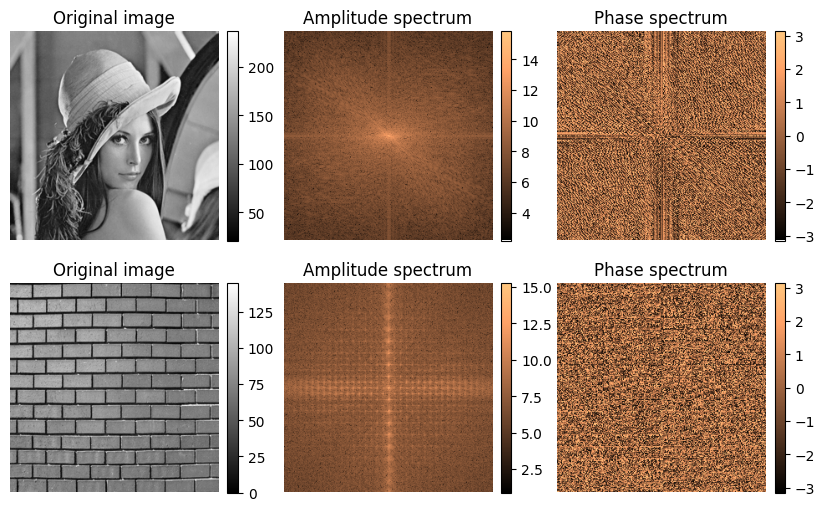

In [5]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(img1_arr, cmap='gray')
plt.title('Original image')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img1_magnitude_spectrum, cmap='copper')
plt.title('Amplitude spectrum')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img1_phase_spectrum, cmap='copper')
plt.title('Phase spectrum')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img2_arr, cmap='gray')
plt.title('Original image')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img2_magnitude_spectrum, cmap='copper')
plt.title('Amplitude spectrum')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img2_phase_spectrum, cmap='copper')
plt.title('Phase spectrum')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.show()

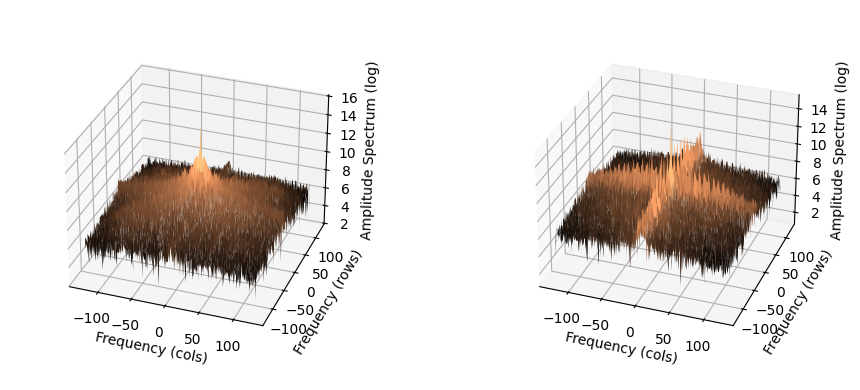

In [6]:
##### 3D ABOUT LENA
# Create a 3D plot
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121, projection='3d')

# Create a meshgrid for x and y coordinates
rows, cols = img1_magnitude_spectrum.shape
x = np.arange(-cols/2, cols/2)
y = np.arange(-rows/2, rows/2)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface
ax.plot_surface(X, Y, img1_magnitude_spectrum, cmap='copper')

# Set labels
ax.set_xlabel('Frequency (cols)')
ax.set_ylabel('Frequency (rows)')
ax.set_zlabel('Amplitude Spectrum (log)')
ax.view_init(elev=30., azim=290.)
ax.set_box_aspect(None, zoom=0.85)





##### 3D ABOUT BRICKS
ax = fig.add_subplot(122, projection='3d')

# Create a meshgrid for x and y coordinates
rows, cols = img2_magnitude_spectrum.shape
x = np.arange(-cols/2, cols/2)
y = np.arange(-rows/2, rows/2)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface
ax.plot_surface(X, Y, img2_magnitude_spectrum, cmap='copper')

# Set labels
ax.set_xlabel('Frequency (cols)')
ax.set_ylabel('Frequency (rows)')
ax.set_zlabel('Amplitude Spectrum (log)')
ax.view_init(elev=30., azim=290.)
ax.set_box_aspect(None, zoom=0.85)


plt.tight_layout()
plt.show()

# Image reconstruction

In [7]:
reconstructed_fourier = img2_amplitude_spectrum * np.exp(1j * img2_phase_spectrum)

In [8]:
reconstructed_image = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstructed_fourier)))

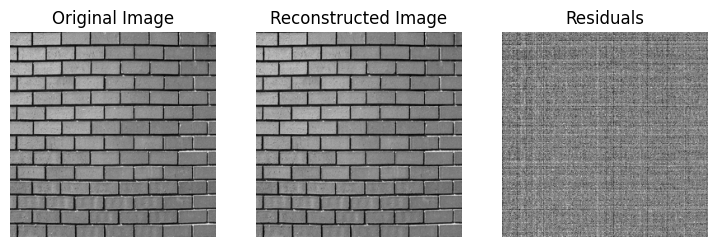

In [9]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(img2_arr, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img2_arr-reconstructed_image, cmap='gray')
plt.title('Residuals')
plt.axis('off')

plt.show()

# Overlap different phases and amplitudes

In [10]:
reconstructed_fourier = img2_amplitude_spectrum * np.exp(1j * img1_phase_spectrum)

In [11]:
reconstructed_image21 = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstructed_fourier)))

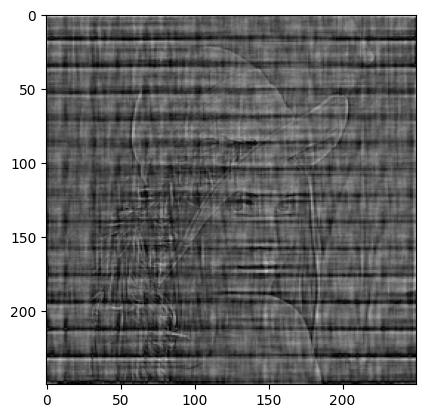

In [12]:
plt.imshow(reconstructed_image21, cmap='gray')

In [13]:
reconstructed_fourier = img1_amplitude_spectrum * np.exp(1j * img2_phase_spectrum)

In [14]:
reconstructed_image12 = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstructed_fourier)))

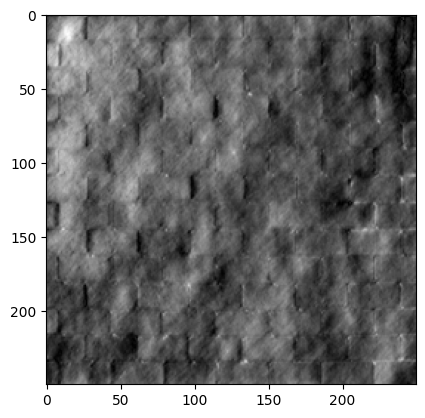

In [15]:
plt.imshow(reconstructed_image12, cmap='gray')

Text(0.5, 1.0, 'phase: bricks, amp.: lena')

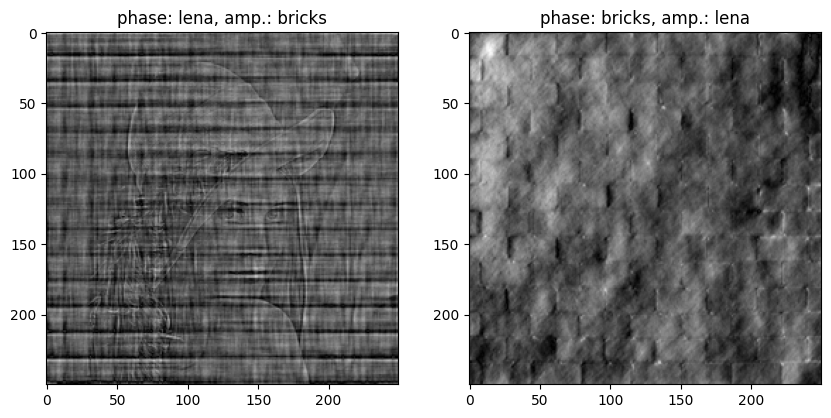

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 15))

ax = axes[0]
ax.imshow(reconstructed_image21, cmap='gray')
ax.set_title("phase: lena, amp.: bricks")

ax = axes[1]
ax.imshow(reconstructed_image12, cmap='gray')
ax.set_title("phase: bricks, amp.: lena")

# Practical applications

In [17]:
import cv2

In [18]:
img = cv2.imread('/content/lena.png', cv2.IMREAD_GRAYSCALE)

In [19]:
def show_images(img_list, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(img_list, titles)):
        plt.subplot(1, len(img_list), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Compute FFT and shift
def compute_fft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift

def compute_ifft(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)


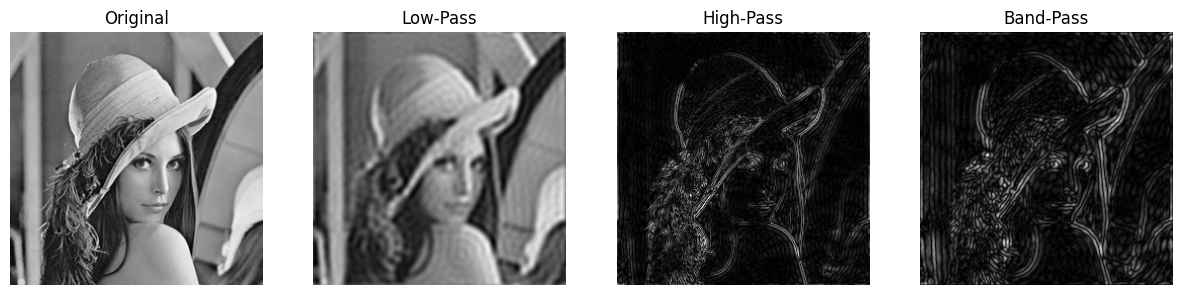

In [20]:
def apply_filter(fshift, filter_mask):
    return fshift * filter_mask

def create_circular_mask(shape, radius, kind='low'):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    y, x = np.ogrid[:rows, :cols]
    dist = (x - ccol)**2 + (y - crow)**2
    if kind == 'low':
        mask[dist <= radius**2] = 1
    elif kind == 'high':
        mask[dist > radius**2] = 1
    elif kind == 'band':
        mask[(dist > (radius[0])**2) & (dist < (radius[1])**2)] = 1
    return mask

fshift = compute_fft(img)
low_mask = create_circular_mask(img.shape, 30, 'low')
high_mask = create_circular_mask(img.shape, 30, 'high')
band_mask = create_circular_mask(img.shape, (20, 60), 'band')

low_pass_img = compute_ifft(apply_filter(fshift, low_mask))
high_pass_img = compute_ifft(apply_filter(fshift, high_mask))
band_pass_img = compute_ifft(apply_filter(fshift, band_mask))

show_images([img, low_pass_img, high_pass_img, band_pass_img],
            ['Original', 'Low-Pass', 'High-Pass', 'Band-Pass'])


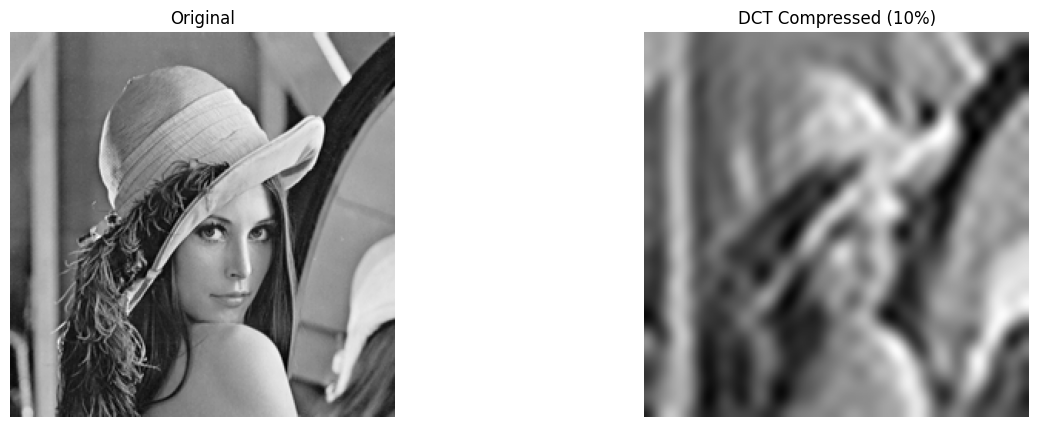

In [21]:
from scipy.fftpack import dct, idct

def apply_dct(img, keep_fraction=0.1):
    imf = dct(dct(img.T, norm='ortho').T, norm='ortho')
    # Zero out most coefficients
    keep = int(imf.shape[0] * keep_fraction), int(imf.shape[1] * keep_fraction)
    compressed = np.zeros_like(imf)
    compressed[:keep[0], :keep[1]] = imf[:keep[0], :keep[1]]
    img_reconstructed = idct(idct(compressed.T, norm='ortho').T, norm='ortho')
    return np.clip(img_reconstructed, 0, 255)

compressed_img = apply_dct(img, 0.1)
show_images([img, compressed_img], ['Original', 'DCT Compressed (10%)'])


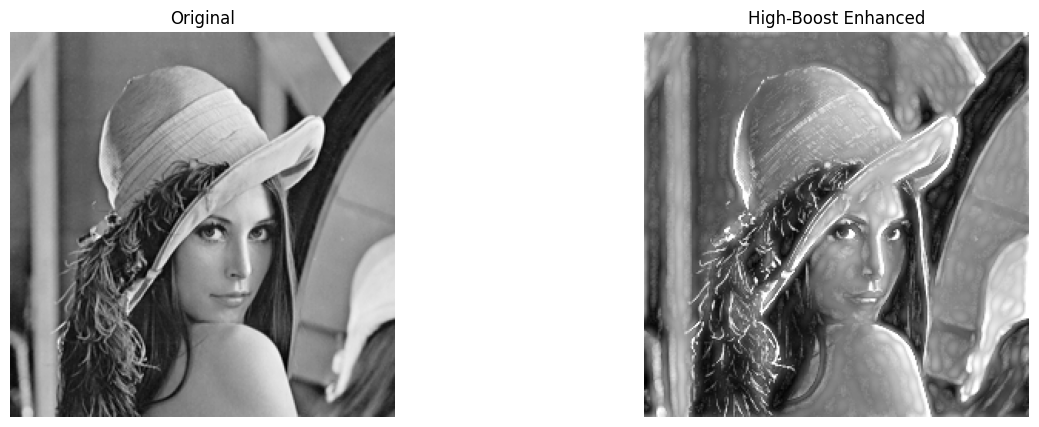

In [23]:
def high_boost_filter(img, boost_factor=1.5):
    fshift = compute_fft(img)
    high_mask = create_circular_mask(img.shape, 20, 'high')
    high_pass = apply_filter(fshift, high_mask)
    high_details = compute_ifft(high_pass)
    enhanced = img + boost_factor * high_details
    return np.clip(enhanced, 0, 255)

enhanced_img = high_boost_filter(img)
show_images([img, enhanced_img], ['Original', 'High-Boost Enhanced'])


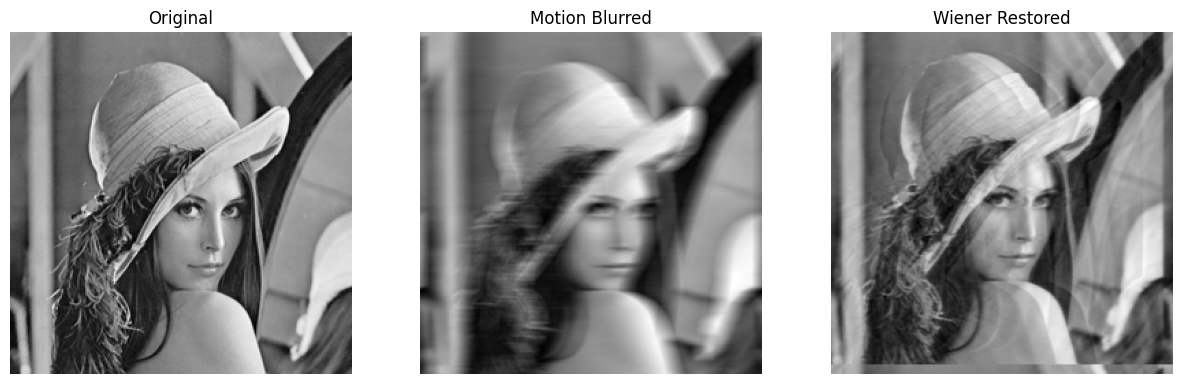

In [24]:
from scipy.signal import convolve2d

def motion_blur_psf(size=15):
    psf = np.zeros((size, size))
    psf[size//2] = np.ones(size)
    return psf / size

def add_blur(img, psf):
    return convolve2d(img, psf, mode='same', boundary='wrap')

def wiener_filter(blurred, psf, K=0.01):
    H = np.fft.fft2(psf, s=blurred.shape)
    G = np.fft.fft2(blurred)
    H_conj = np.conj(H)
    F_est = (H_conj / (H * H_conj + K)) * G
    restored = np.fft.ifft2(F_est)
    return np.abs(restored)

psf = motion_blur_psf()
blurred_img = add_blur(img, psf)
restored_img = wiener_filter(blurred_img, psf)

show_images([img, blurred_img, restored_img], ['Original', 'Motion Blurred', 'Wiener Restored'])


Estimated shift (y, x): (np.int64(220), np.int64(200))


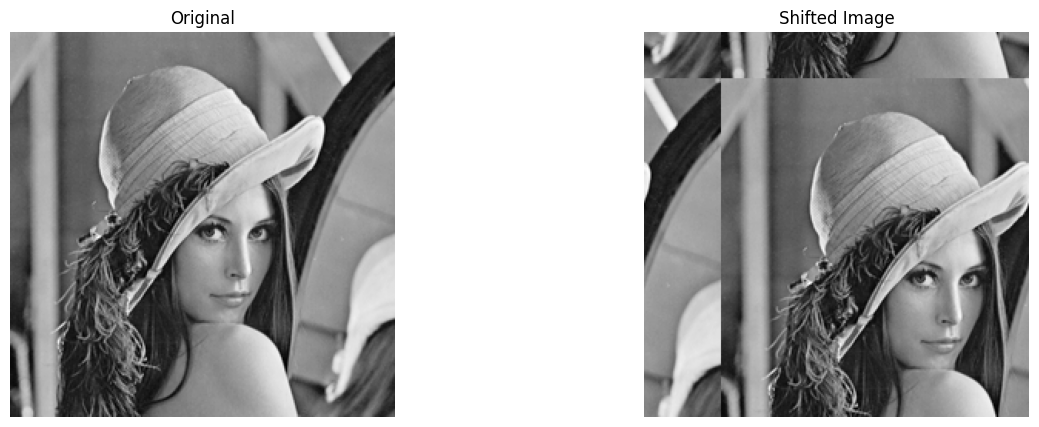

In [25]:
def phase_correlation(img1, img2):
    f1 = compute_fft(img1)
    f2 = compute_fft(img2)
    R = f1 * np.conj(f2)
    R /= np.abs(R)
    corr = np.fft.ifft2(R)
    maxima = np.unravel_index(np.argmax(np.abs(corr)), corr.shape)
    return maxima

# Create a shifted version of the image
shifted = np.roll(img, shift=(30, 50), axis=(0, 1))
peak = phase_correlation(img, shifted)

print("Estimated shift (y, x):", peak)
show_images([img, shifted], ['Original', 'Shifted Image'])


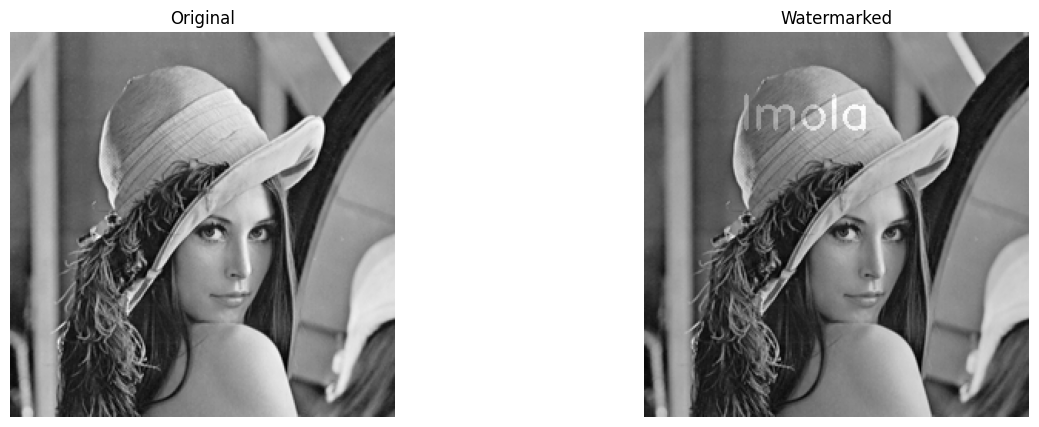

In [29]:
def watermark_image(img, text='Imola', strength=50):
    fshift = compute_fft(img)
    rows, cols = img.shape
    pos = (rows//4, cols//4)

    # Embed watermark by modifying frequency magnitudes
    watermark = np.zeros_like(img, dtype=np.uint8)
    cv2.putText(watermark, text, pos, cv2.FONT_HERSHEY_SIMPLEX, 1, 1, 2, cv2.LINE_AA)
    fshift += strength * np.fft.fftshift(np.fft.fft2(watermark))

    watermarked_img = compute_ifft(fshift)
    return np.clip(watermarked_img, 0, 255)

watermarked = watermark_image(img)
show_images([img, watermarked], ['Original', 'Watermarked'])